In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_feather("data/4.975keV_1000Events_all.feather")

In [7]:
df['nHits']

0      179
1      175
2      167
3      176
4      166
      ... 
995    177
996    167
997    172
998    163
999    179
Name: nHits, Length: 1000, dtype: int64

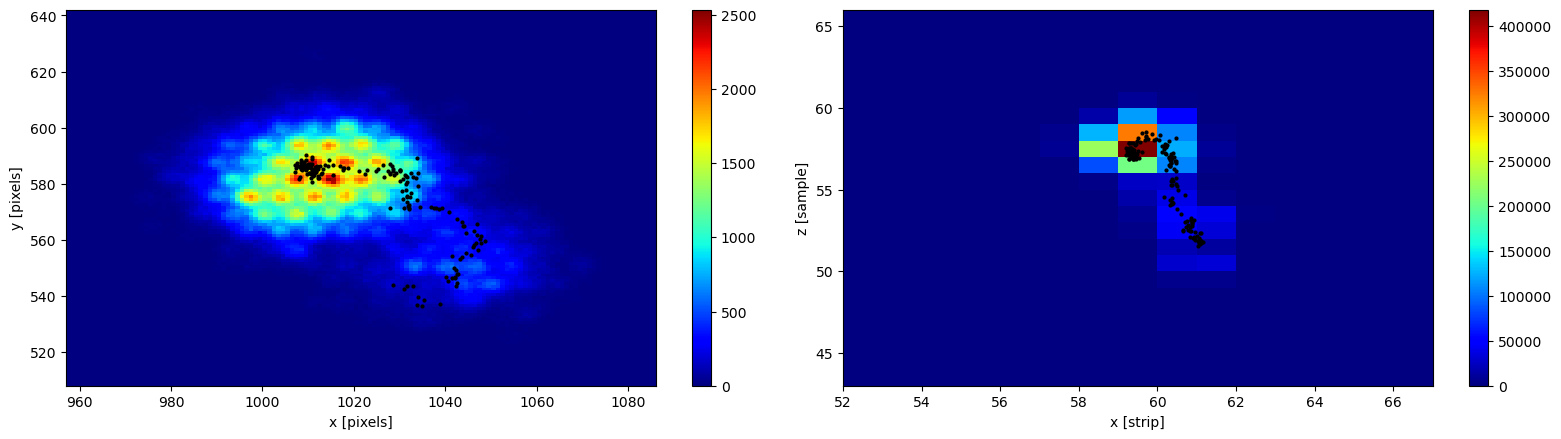

In [3]:
i = 0
tmp = df.iloc[i]
plt.figure(figsize=(16,4.5))
plt.subplot(1,2,1)
'''Camera readout'''
plt.hist2d(tmp['xcam'],tmp['ycam'],weights=tmp['qcam'],bins=(2048,1152),range=((0,2048),(0,1152)),cmap='jet')
plt.plot(tmp['x']*2048/8+2048/2,tmp['y']*2048/8+1152/2,'o',color='k',markersize = 2)
plt.xlim(tmp['xcam'].min()-10,tmp['xcam'].max()+10)
plt.ylim(tmp['ycam'].min()-10,tmp['ycam'].max()+10)
plt.xlabel('x [pixels]')
plt.ylabel('y [pixels]')
plt.colorbar()
plt.subplot(1,2,2)
'''ITO readout'''
plt.hist2d(tmp['xITO'],tmp['zITO'],weights=tmp['qITO'],bins=(120,150),range=((0,120),(0,150)),cmap='jet')
plt.plot(tmp['x']*120/10+60,tmp['z']*150/3.9,'o',color='k',markersize = 2)
plt.xlim(tmp['xITO'].min()-5,tmp['xITO'].max()+5)
plt.ylim(tmp['zITO'].min()-5,tmp['zITO'].max()+5)
plt.xlabel('x [strip]')
plt.ylabel('z [sample]')
plt.colorbar()
plt.tight_layout()
plt.show()

In [24]:
df['x']

0      [-0.05480595029233416, 0.07080568636602858, 0....
1      [0.10250603111478496, 0.09193096597915558, 0.0...
2      [0.1482353899350362, 0.12487924303019388, 0.09...
3      [-0.15042482426768844, -0.1273036443132273, -0...
4      [0.013593638047892011, 0.010306598900365057, 0...
                             ...                        
995    [0.1786227617036858, 0.17746203956054124, 0.12...
996    [0.07911568305440278, 0.0365140198983372, 0.01...
997    [-0.021300545146189186, -0.01076413443564934, ...
998    [-0.015452117292363851, 0.020463302408892162, ...
999    [0.11049180487603899, 0.09428942791305485, 0.0...
Name: x, Length: 1000, dtype: object

In [11]:
df.columns

Index(['nHits', 'x', 'y', 'z', 't', 'flag', 'truth_dir', 'truth_energy',
       'ionization_energy', 'truth_theta', 'truth_phi', 'drift_length',
       'xdiff', 'ydiff', 'zdiff', 'xamp', 'yamp', 'zamp', 'xcam', 'ycam',
       'qcam', 'xITO', 'zITO', 'qITO'],
      dtype='object')

In [13]:
df['x'].apply(lambda x: len(x)).min()

151

In [16]:
df.columns

Index(['nHits', 'x', 'y', 'z', 't', 'flag', 'truth_dir', 'truth_energy',
       'ionization_energy', 'truth_theta', 'truth_phi', 'drift_length',
       'xdiff', 'ydiff', 'zdiff', 'xamp', 'yamp', 'zamp', 'xcam', 'ycam',
       'qcam', 'xITO', 'zITO', 'qITO'],
      dtype='object')

In [18]:
tmp = df.iloc[0]
np.array([tmp['xcam'],tmp['ycam'],tmp['qcam']]).T

array([[1055,  518,    1],
       [1058,  519,    1],
       [1061,  519,    1],
       ...,
       [1013,  631,    1],
       [1010,  632,    1],
       [1012,  632,    1]])

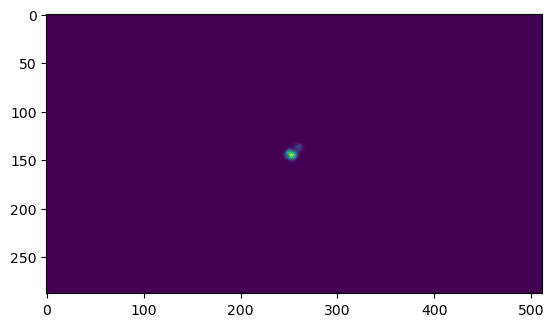

In [27]:
im = np.histogram2d(tmp['xcam'],tmp['ycam'],weights=tmp['qcam'],bins=(2048//4,1152//4),range=((0,2048),(0,1152)))[0].T
plt.imshow(im)

(array([  2.,   5.,  35., 115., 164., 326., 214., 105.,  31.,   3.]),
 array([151. , 154.8, 158.6, 162.4, 166.2, 170. , 173.8, 177.6, 181.4,
        185.2, 189. ]),
 <BarContainer object of 10 artists>)

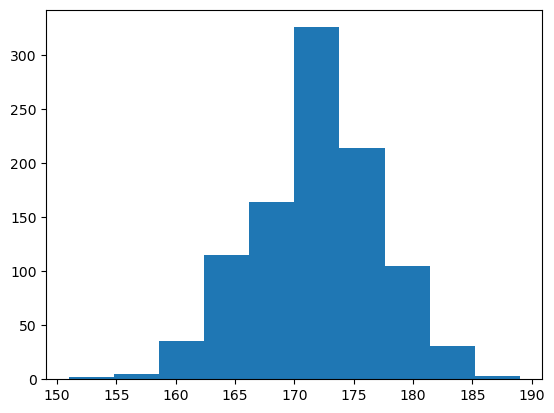

In [30]:
plt.hist(df['nHits'])